# The General Linear F-Test

Source: [PennState Stat 501](https://newonlinecourses.science.psu.edu/stat501/node/295/)

The "general linear F-test" involves three basic steps, namely:

- Define a larger full model. (By "larger," we mean one with more parameters.)
- Define a smaller reduced model. (By "smaller," we mean one with fewer parameters.)
- Use an F-statistic to decide whether or not to reject the smaller reduced model in favor of the larger full model.


As you can see by the wording of the third step, the null hypothesis always pertains to the reduced model, while the alternative hypothesis always pertains to the full model.

## The full model

The "full model", which is also sometimes referred to as the "unrestricted model," is the model thought to be most appropriate for the data. For simple linear regression, the full model is:

$$y_{i}=\left(\beta_{0}+\beta_{1} x_{i 1}\right)+\epsilon_{i}$$

The data used in this notebooks are the following:

- State
- Lat
- Mort
- Ocean
- Long


### Upload data

In [0]:
from GoogleDrivePy.google_authentification import connect_service_local
from GoogleDrivePy.google_drive import connect_drive
import pandas as pd
import numpy as np
import os
import re
pathcredential = '/Users/Thomas/Google Drive/Projects/Data_science/Google_code_n_Oauth/Client_Oauth/Google_auth/'
scopes = ['https://www.googleapis.com/auth/documents.readonly',
            'https://www.googleapis.com/auth/drive', 
         'https://www.googleapis.com/auth/spreadsheets.readonly']
serviceaccount = '/Users/Thomas/Google Drive/Projects/Data_science/Google_code_n_Oauth/Client_Oauth/Google_auth/valid-pagoda-132423-c6ac84b41833.json'
cs = connect_service_local.connect_service_local(path_json =pathcredential,
                                                 path_service_account = serviceaccount,
                                                 scope = scopes)
service = cs.get_service()

Service Google Drive and Docs, Sheet are now connected. 
Service Google Drive is stored as <googleapiclient.discovery.Resource object at 0x10d15c5c0> and accessible with "drive" 
Service Google Doc is stored as <googleapiclient.discovery.Resource object at 0x10d1d64e0> and accessible with "doc" 
Service Google Sheet is stored as <googleapiclient.discovery.Resource object at 0x10d29c278>and accessible with "sheet"


In [0]:
headers = ['State','Lat','Mort','Ocean','Long']
range_name = 'skin_cancer!A2:E50'

df = service['sheet'].spreadsheets().values().get(
    spreadsheetId='1vbQsysJMSeizjUVu_GFoXamMu9Zn_i6JpJ-vll1AHPo',
    range=range_name).execute()
df = pd.DataFrame(df.get('values', []), columns=headers)
df = df.apply(pd.to_numeric, errors='ignore')

### Fiited values

Here's a plot of a hypothesized full model for a set of data that state latitudes and skin cancer mortalities:

In [0]:
from scipy import stats
import matplotlib.pyplot as plt

In [0]:
y = df['Mort']
x = df['Lat']

data_x = [30, 35]
data_y = [209.86, 141]

slope: -5.977636    intercept: 389.189351
r-squared: 0.679830


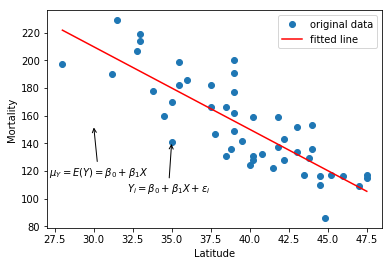

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r-squared: %f" % r_value**2)
  
#### Plot with label
labels = [r'$\mu_{Y} = E(Y)=\beta_{0}+\beta_{1} X$',
          r'$Y_{i}= \beta_{0}+\beta_{1} X+\varepsilon_{i}$']

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope * x, 'r', label='fitted line')

for label, x_1, y_2 in zip(labels, data_x, data_y):
  plt.annotate(label,
            xy=(x_1, y_2), xycoords='data',
            xytext=(-45, -50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Mortality')
plt.show()

The question we have to answer in each case is "does the full model describe the data well?"

## The reduced model

The "reduced model," which is sometimes also referred to as the "restricted model," is the model described by the null hypothesis $H0$.

 For simple linear regression, a common null hypothesis is $H_{0} : \beta_{1}=0$. In this case, the reduced model is obtained by "zeroing-out" the slope β1 that appears in the full model. That is, the reduced model is:
 
 $$
y_{i}=\beta_{0}+\epsilon_{i}
$$

This reduced model suggests that each response $y_{i}$ is a function only of some overall mean, $\beta_{0}$ and some error $\varepsilon_{i}$.

Let's take another look at the plot of mortality point average against height, but this time with a line representing what the hypothesized population regression line might look like for the reduced model:

In [0]:
y = df['Mort']
x = df['Lat']
interc = df['Mort'].mean()

data_x = [30, 35]
data_y = [interc, 141]

labels = [r'$\mu_{Y} = E(Y)=\beta_{0}$',
          r'$Y_{i}= \beta_{0} +\varepsilon_{i}$']

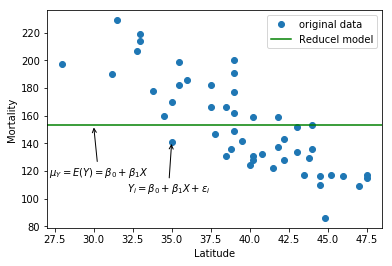

In [0]:
plt.plot(x, y, 'o', label='original data')
plt.axhline(interc, label='Reducel model', color = 'g')
#plt.plot(x, intercept + slope * x, 'r', label='Full model')


for label, x_1, y_2 in zip(labels, data_x, data_y):
  plt.annotate(label,
            xy=(x_1, y_2), xycoords='data',
            xytext=(-45, -50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Mortality')
plt.show()

It doesn't appear as if the reduced model would do a very good job of summarizing the trend in the population.

## The test

How do we decide if the reduced model or the full model does a better job of describing the trend in the data when it can't be determined by simply looking at a plot? 

What we need to do is to quantify how much error remains after fitting each of the two models to our data. That is, we take the general linear test approach:

- "Fit the full model" to the data.
  - Obtain the least squares estimates of $\beta_0$  and $\beta_1$
  - Determine the error sum of squares, which we denote "SSE(F)."
- "Fit the reduced model" to the data.
  - Obtain the least squares estimate of $\beta_0$
  - Determine the error sum of squares, which we denote "SSE(R)."
  
  Recall that, in general, the error sum of squares is obtained by summing the squared distances between the observed and fitted (estimated) responses:
  
$$\sum(\text { observed }-\text { fitted })^{2}$$

Therefore, since $y_i$ is the observed response and $\hat{y}_{i}$ is the fitted response for the full model:

$$S S E(F)=\sum\left(y_{i}-\hat{y}_{i}\right)^{2}$$

And, since $y_i$ is the observed response and $\overline{y}$ is the fitted response for the reduced model:

$$S S E(R)=\sum\left(y_{i}-\overline{y}\right)^{2}$$

Let's get a better feel for the general linear F-test approach by applying it to the skin cancer dataset

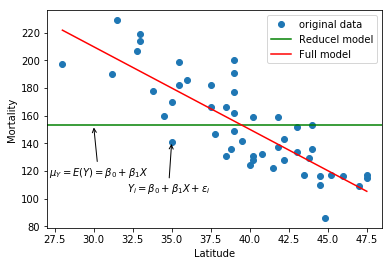

In [0]:
plt.plot(x, y, 'o', label='original data')
plt.axhline(interc, label='Reducel model', color = 'g')
plt.plot(x, intercept + slope * x, 'r', label='Full model')


for label, x_1, y_2 in zip(labels, data_x, data_y):
  plt.annotate(label,
            xy=(x_1, y_2), xycoords='data',
            xytext=(-45, -50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Mortality')
plt.show()

The SSE for the reduce model is the sum of the square of $y$ minus the intercept (ie average of $y$)

In [0]:
SSE_R = np.sum(np.power((y - interc), 2))
SSE_R

53637.265306122456

The SSE for the full model is the sum of the square of $y$ minus $\hat{y}$ (ie estimated $y$ from the full model)

In [0]:
y_hat  = intercept + slope * x
SSE_F = np.sum(np.power((y - y_hat), 2))
SSE_F

17173.065103121957

Here, there is quite a big difference in the estimated equation for the full model (red line) and the estimated equation for the reduced model (green line). 

The error sums of squares quantify the substantial difference in the two estimated equations:

$$\begin{aligned} \operatorname{SSE}(F) &=\sum\left(y_{i}-\hat{y}_{i}\right)^{2}=17173 \\ \operatorname{SSE}(R) &=\sum\left(y_{i}-\overline{y}\right)^{2}=53637 \end{aligned}$$

Adding latitude to the reduced model to obtain the full model reduces the amount of error by 36464 (from 53637 to 17173). 

That is, adding latitude to the model substantially reduces the variability in skin cancer mortality. In this case, there appears to be a big advantage in using the larger full model over the simpler reduced model.

Where are we going with this general linear test approach? In short:

- The general linear test involves a comparison between SSE(R) and SSE(F).

- SSE(R) can never be smaller than SSE(F). It is always larger than (or possibly the same as) SSE(F)
  - If SSE(F) is close to SSE(R), then the variation around the estimated full model regression function is almost as large as the variation around the estimated reduced model regression function. If that's the case, it makes sense to use the simpler reduced model
  - On the other hand, if SSE(F) and SSE(R) differ greatly, then the additional parameter(s) in the full model substantially reduce the variation around the estimated regression function. In this case, it makes sense to go with the larger full model.
  
How different does SSE(R) have to be from SSE(F) in order to justify using the larger full model? 

The general linear F-statistic:

$$F^{*}=\left(\frac{S S E(R)-S S E(F)}{d f_{R}-d f_{F}}\right) \div\left(\frac{S S E(F)}{d f_{F}}\right)$$

helps answer this question.

The F-statistic intuitively makes sense — it is a function of SSE(R)-SSE(F), the difference in the error between the two models. 

The degrees of freedom — denoted dfR and dfF — are those associated with the reduced and full model error sum of squares, respectively.

We use the general linear F-statistic to decide whether or not:

- to reject the null hypothesis $H0$: The reduced model
- in favor of the alternative hypothesis $HA$: The full model

In general, we reject $H0$ if $F*$ is large — or equivalently if its associated P-value is small.

## The test applied to the simple linear regression model

For simple linear regression, it turns out that the general linear F-test is just the same ANOVA F-test

As noted earlier for the simple linear regression case, the full model is:

$$y_{i}=\left(\beta_{0}+\beta_{1} x_{i 1}\right)+\epsilon_{i}$$

and the reduced model is:

$$y_{i}=\beta_{0}+\epsilon_{i}$$

Therefore, the appropriate null and alternative hypotheses are specified either as:

$$\begin{array}{l}{H_{0} : y_{i}=\beta_{0}+\varepsilon_{i}} \\ {H_{\mathrm{A}} : y_{i}=\beta_{0}+\beta_{1} x_{i}+\varepsilon_{i}}\end{array}$$

or as:

$$\begin{array}{l}{H_{0} : \beta_{1}=0} \\ {H_{\mathrm{A}} : \beta_{1} \neq 0}\end{array}$$

The degrees of freedom associated with the error sum of squares for the reduced model is $$n-1$$, and:

$$\operatorname{SSE}(R)=\sum\left(y_{i}-\overline{y}\right)^{2}=S S T O$$

The degrees of freedom associated with the error sum of squares for the full model is n-2, and:

$$\operatorname{SSE}(F)=\sum\left(y_{i}-\hat{y}_{i}\right)^{2}=S S E$$

Now, we can see how the general linear F-statistic just reduces algebraically to the ANOVA F-test that we know (cf notebook ANOVA):

-$$F^{*}=\left(\frac{S S E(R)-S S E(F)}{d f_{R}-d f_{F}}\right) \div\left(\frac{S S E(F)}{d f_{F}}\right)$$

Specifically: 

- $d f_{R}=n-1$ = > $\operatorname{SSE}(R)=S S T O$
- $d f_{F}=n-2$ => $S S E(F)=S S E$

becomes:

$$F^{*}=\left(\frac{S S T O-S S E}{(n-1)-(n-2)}\right) \div\left(\frac{S S E}{(n-2)}\right)=\frac{M S R}{M S E}$$

That is, the general linear F-statistic reduces to the ANOVA F-statistic:

$$F^{*}=\frac{M S R}{M S E}$$

For the skin cancer mortality example:

$$F^{*}=\frac{M S R}{M S E}=\frac{36464 / 1}{17173 / 47}=\frac{36464}{365.4}=99.8$$

The P-value is calculated as usual.

 The P-value answers the question:
 
 - "what is the probability that we’d get an F* statistic as large as we did, if the null hypothesis were true?"
 
 The P-value is determined by comparing F* to an F distribution with 1 numerator degree of freedom and n-2 denominator degrees of freedom.
 
For the skin cancer mortality example, the P-value is 0.000 (so we reject H0 and we favor the full model).

## F-Test/ANOVA for model comparison

We can use the ANOVA table to estimate which model performs better between the constrained model and the unconstrained model. 

Let's say, we are estimating miles-per-gallon over different explanatory variables. We need to define two models:

- Constrained model
  - $Y = \beta_0 + \beta_1 * X + 0 * \beta_2 * Z$
- Unconstrained model
  - $Y = \beta_0 + \beta_1 * X + \beta_2 * Z$
  
In the constrained model, we force $\beta_2$ to be zero. 


If you recall from the lesson on ANOVA, the table of analysis displays the residual variance of the model. We can use this information to estimate whether or not adding a new variable tends to decrease the variance of the error. 

When we have this information in hand, we can compute the F statistic, covert it to a p-value and conclude if the unconstrained model does a better job (ie a p-value lower than 0.05)

To construct the F statistic, we need to follow these steps. At that point, you should be familiar with most of the concepts used during the computation. 

- Step 1: Compute the SST:  total sum of squares. It is common for all models
  - $SST = \sum_{1}^{n}\left(y_{i}-\overline{y}\right)^{2}$
- Step 2: Compute SSE for each model: Residual Sum of Squares.
  - $SSE_m = \sum_{1}^{n}\left(y_{i}-\hat{y}\right)^{2}_m$
  - a component that is just due to random error
- Step 3: compute $df_m$ for each model: degree of freedom
  - $df_{constrained} = n - 1$
  - $df_{constrained} = n - k -1$
- Step 4: Compute the R-squared for each model
  - $R^2_m = 1 -  SSE_m / SST$
- Step 5: Compute F-test:
  - $F=\frac{\left(R_{unconstrained}^{2}-R_{constrained}\right) \times\left(\mathrm{df_{constrained}}\right)}{\left(\left(1-R_{unconstrained}^{2}\right) \times \mathrm{df_{constrained}}\right)}$
- Step 6: Convert F-test to p-value




### example 1

In the next example, we will use the mtcar dataset to estimate two models

- Constrained model
  - $mpg = \beta_0 + \beta_1 * wt + 0 * \beta_2 * qsec$
- Unconstrained model
  - $mpg = \beta_0 + \beta_1 * wt + \beta_2 * qsec$
  
In the constrained model, we force $\beta_2$ to be zero. 

- $wt$ stands for Weight (1000 lbs)
- $qsec$ stands for 1/4 mile time. 

The library `statmodels` include a module to compute the ANOVA test. 

First we import the data

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

headers = ['brands','mpg','cyl','disp','hp','drat','wt',
           'qsec','vs','am','gear','carb', 'random']
range_name = 'mtcars.csv!A2:M33'

df = service['sheet'].spreadsheets().values().get(
    spreadsheetId='1JxBalOQPoFnXoLdn7R4EqOHmjWLC_YJxOtk6cJp36h0',
    range=range_name).execute()
df = pd.DataFrame(df.get('values', []), columns=headers)
df = df.apply(pd.to_numeric, errors='ignore')

Then we estimate the constrained and unconstrained models. We print the R square of both models

In [0]:
const_model = smf.ols(formula='mpg ~ wt', data=df).fit()
unconst_model = smf.ols(formula='mpg ~ wt + qsec', data=df).fit()
print('R2 M constrained: ', const_model.rsquared)
print('R2 M unconstrained: ', unconst_model.rsquared)

R2 M constrained:  0.7528327936582646
R2 M unconstrained:  0.8264161273395515


At last, we use  `anova_lm` to get the ANOVA table. Without surprise, the unconstrained model performs better (p-value below 0.05)

In [0]:
sm.stats.anova_lm(const_model,
                  unconst_model,
                  typ=1)

/Users/Thomas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Thomas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Thomas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,30.0,278.321938,0.0,NaN,NaN,NaN
1,29.0,195.463632,1.0,82.858306,12.293289,0.0015


### Example 2

The next example shows you a special case of the F-test. If the unconstrained model does not have explanatory variables except the intercept, then the F-test is equal to the ANOVA F-Test

In [0]:
const_model = smf.ols(formula='mpg ~ 1', data=df).fit()
unconst_model = smf.ols(formula='mpg ~ wt + qsec', data=df).fit()
print('F test M unconstrained: ', unconst_model.fvalue)

F test M constrained:  69.03310579931461


In [0]:
sm.stats.anova_lm(const_model,
                  unconst_model,
                  typ=1)

/Users/Thomas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Thomas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Thomas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,31.0,1126.047187,0.0,NaN,NaN,NaN
1,29.0,195.463632,2.0,930.583556,69.033106,9.394765e-12


### Example 3

In the next example, we show that the unconstrained model does not always perform better. We have created a random variable in the original dataset as follow = $\overline{y} + \epsilon *10$. $\epsilon$  is normally distributed

It is clear from the scatter plot bellow that there is no correlation between $y$ and $random$. Therefore, the unconstrained model should not perform better than the unconstrained. 

As mentionned in our previous lecture, we should not rely only on the R-squared. In our example, adding a new variable increase the R-square but the F-test failed to rejected H0. Our unconstrained model is not better than the constrained model.



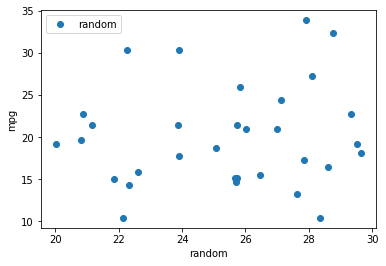

In [0]:
plt.plot(df['random'], df['mpg'], 'o', label='random')
plt.legend()
plt.xlabel('random')
plt.ylabel('mpg')
plt.show()

In [0]:
const_model = smf.ols(formula='mpg ~ wt+ qsec', data=df).fit()
unconst_model = smf.ols(formula='mpg ~ wt + qsec+ random', data=df).fit()

print('R2 M constrained: ', const_model.rsquared)
print('R2 M unconstrained: ', unconst_model.rsquared)

R2 M constrained:  0.8264161273395515
R2 M unconstrained:  0.8402916037275365


In [0]:
sm.stats.anova_lm(const_model,
                  unconst_model,
                  typ=1)

/Users/Thomas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Thomas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Thomas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,29.0,195.463632,0.0,NaN,NaN,NaN
1,28.0,179.839190,1.0,15.624441,2.432642,0.130065


### ANOVA test from scratch

To compute the ANOVA t-test for model comparison, we need to construct the Analysis of variance table. Once we have computed the ANOVA table, we concert the F-value to a p-value. If the p-value is lower than the threshold, the unconstrained model does a better job than the constrained model. 
